# Working with the dataset

1.   The Dataset https://universe.roboflow.com/usmanchaudhry622-gmail-com/traffic-and-road-signs
2.   Google Drive https://drive.google.com/drive/folders/1NeJhtWPfeU8lxht_9Ud_c4Ecg6ef4FBA



In [1]:
# Drive mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


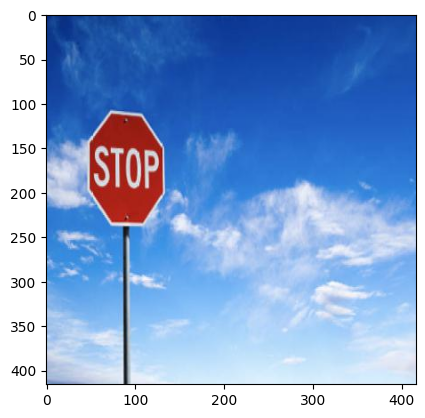

In [ ]:
#example from the dataset
import matplotlib as plt
import matplotlib.pyplot as plt
import os
os.chdir('/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/train')
img = plt.imread('road97_png_jpg.rf.9bd3ed875fb0cd3b6c1fb8e55b837d23.jpg')
plt.imshow(img)


#Analysis of the data
In this section we analyzed the dataset, the classes and the amount of photos for each class. Finally, we organized the dataset in a well structured directory.

In [ ]:
import pandas as pd

annotations_test = pd.read_csv('/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/_annotations_test.csv')
annotations_train = pd.read_csv('/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/_annotations_train.csv')
annotations_valid = pd.read_csv('/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/_annotations_valid.csv')


class_counts_test = annotations_test['class'].value_counts()
class_counts_train = annotations_train['class'].value_counts()
class_counts_valid = annotations_valid['class'].value_counts()

total_classes = len(class_counts_test)
print("Total number of classes:", total_classes)
print("\nClass names and their counts:")
print(class_counts_test, "\n\n")

total_classes = len(class_counts_train)
print("Total number of classes:", total_classes)
print("\nClass names and their counts:")
print(class_counts_train, "\n\n")

total_classes = len(class_counts_valid)
print("Total number of classes:", total_classes)
print("\nClass names and their counts:")
print(class_counts_valid, "\n\n")


Total number of classes: 3

Class names and their counts:
Speed Limit 30 KMPh    813
Speed Limit 20 KMPh    140
No_Over_Taking          71
Name: class, dtype: int64 


Total number of classes: 28

Class names and their counts:
Attention Please-                      473
Beware of children                     429
Give Way                               425
Slippery Road Ahead                    403
Truck traffic is prohibited            335
Turn left ahead                        333
No Entry                               332
Turn right ahead                       326
Keep-Right                             324
Uneven Road                            312
Go Straight or Turn Right              305
Round-About                            292
Dangerous Rright Curve Ahead           288
Straight Ahead Only                    264
Left Zig Zag Traffic                   263
50 mph speed limit                     245
Keep-Left                              236
CYCLE ROUTE AHEAD WARNING              214

In [ ]:
import os
import shutil

base_dir = '/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/'

dataset_dir = os.path.join(base_dir, 'dataset')



def organize_photos(annotations_df, data_type):
    for index, row in annotations_df.iterrows():
        filename = row['filename']
        class_name = row['class']
        source_path = os.path.join(base_dir, data_type, filename)
        destination_dir = os.path.join(dataset_dir, data_type, class_name)
        os.makedirs(destination_dir, exist_ok=True)
        destination_path = os.path.join(destination_dir, filename)
        shutil.copy(source_path, destination_path)


organize_photos(annotations_train, 'train')
organize_photos(annotations_valid, 'valid')

In [ ]:
import os

base_dir = '/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/'

dataset_dir = os.path.join(base_dir, 'dataset/train')
# Function to count files recursively
def count_files(directory):
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

total_files = count_files(dataset_dir)

print("Total number of files in the dataset directory and its subdirectories:", total_files)

Total number of files in the dataset directory and its subdirectories: 3304


The initial amount of photos for training is 7000+, so we reduced it by half by deleting unnecessary classes, redundant for Kazakhstan.
Classes left:
- cycle route ahead warning
- end of all speed and passing limits
- give way
- go straight or turn left
- go straight or turn right
- no entry
- round-about
- straight ahead only
- stop sign
- truck traffic prohibited
- turn left ahead
- turn right ahead

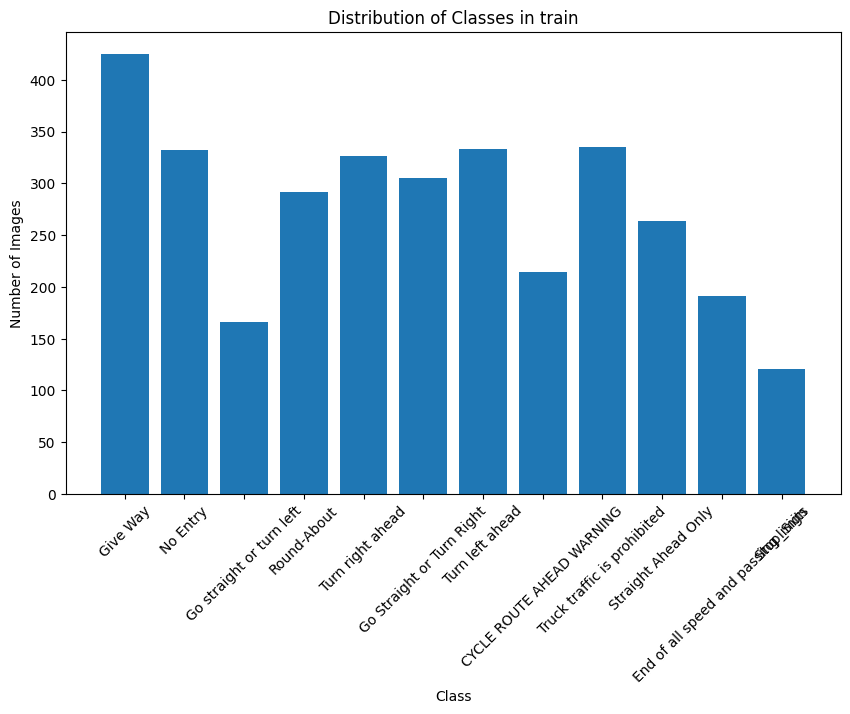

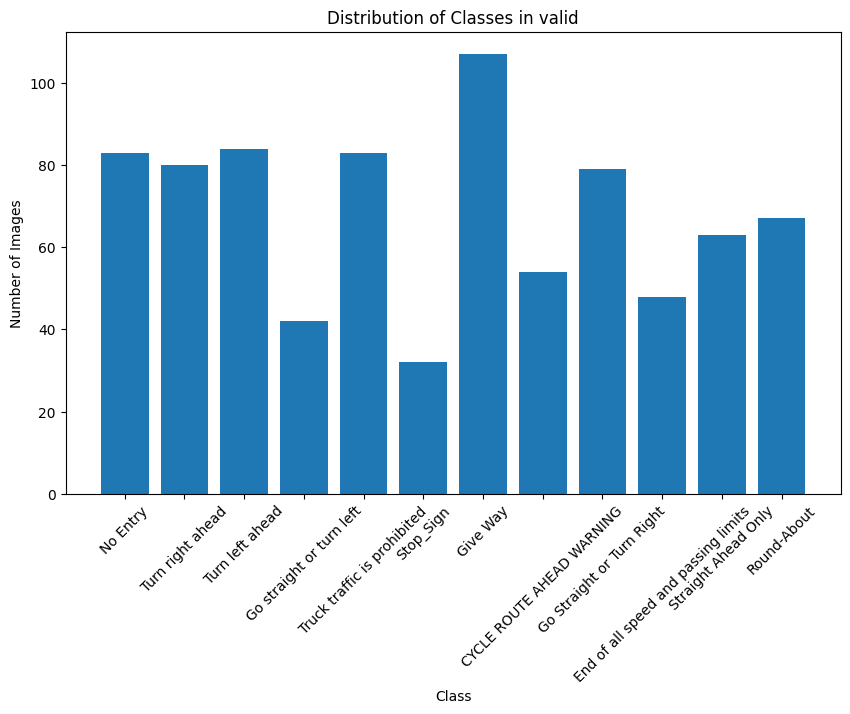

In [9]:
import os
import matplotlib.pyplot as plt

base_dir = '/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/dataset/train'
base_dir1 = '/content/drive/MyDrive/AP/Traffic and Road Signs.v1i.tensorflow (1)/dataset/valid'

class_names = os.listdir(base_dir)
class_counts = {class_name: len(os.listdir(os.path.join(base_dir, class_name))) for class_name in class_names}

class_names1 = os.listdir(base_dir1)
class_counts1 = {class_name: len(os.listdir(os.path.join(base_dir1, class_name))) for class_name in class_names1}

plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in train')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(class_counts1.keys(), class_counts1.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in valid')
plt.xticks(rotation=45)
plt.show()